In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [45]:
bottle=pd.read_csv("http://iali.in/datasets/mushrooms.csv")

In [46]:
bottle.head(5)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [47]:
#list all columns in dataframe
bottle.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [48]:
bottle.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [49]:
#all the featuers/columns are of object type.Hence we need to convert all the columns inti integer data type
from sklearn import preprocessing
encode=preprocessing.LabelEncoder()

In [50]:
#To see what value are strings/objects of a features are converted to I converted "habitat" feature to numerical data.
#This converted data is stored in "habitat_code".
#If you want to see what each column is getting converted into you can do repeat this for each feature in this case 23 feature.
bottle["habitat_code"]=encode.fit_transform(bottle["habitat"])

In [51]:
bottle


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-color-above-ring  \
0               c         n          k  ...                      w   
1               c         b          k  ...                      w   
2               c         b          n  ...                      w   
3               c         n          n  ...                      w   
4               w         b          k  ...                      w   
...           ...       ...        ...  ...                    ...   
8119            c         b          y  ...                      o   
8120            c         b          y  ...                      o   
8121            c         b          n  ...                      o   
8122            c         n          b  ...                      w   
8123            c         b          y  ...                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat habitat_code  
0                    k          s       u            5  
1                    n          n       g            1  
2                    n          n       m            3  
3                    k          s       u            5  
4                    n          a       g            1  
...                ...        ...     ...          ...  
8119                 b          c       l            2  
8120                 b          v       l            2  
8121                 b          c       l            2  
8122                 w          v       l            2  
8123                 o          c       l            2  

[8124 rows x 24 columns]

In [100]:
#Delete rows that have null values
bottle=bottle.dropna(axis=0) # Drop Rows having Null Values
bottle #No rows have null values.Hence no rows were dropped

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

In [52]:
#here you can see each feature is in object except habitat habitai_code which is of int data type
bottle.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
habitat_code                 int32
dtype: object

In [53]:
#list all columns in dataframe
bottle=bottle.apply(encode.fit_transform)

In [54]:
#Here you can see habitat_code is still present to remove habitat_code wrie the below code
#bottle=bottle.drop("habitat_code",axis=1)

In [55]:
bottle
#thus we succesfully encoded the datset.

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                          7                       7          0           2   
1                          7                       7          0           2   
2                          7                       7          0           2   
3                          7                       7          0           2   
4                          7                       7          0           2   
...                      ...                     ...        ...         ...   
8119                       5                       5          0           1   
8120                       5                       5          0           0   
8121                       5                       5          0           1   
8122                       7                       7          0           2   
8123                       5                       5          0           1   

      ring-number  ring-type  spore-print-color  population  habitat  \
0               1          4                  2           3        5   
1               1          4                  3           2        1   
2               1          4                  3           2        3   
3               1          4                  2           3        5   
4               1          0                  3           0        1   
...           ...        ...                ...         ...      ...   
8119            1          4                  0           1        2   
8120            1          4                  0           4        2   
8121            1          4                  0           1        2   
8122            1          0                  7           4        2   
8123            1          4                  4           1        2   

      habitat_code  
0                5  
1                1  
2                3  
3                5  
4                1  
...            ...  
8119             2  
8120             2  
8121             2  
8122             2  
8123             2  

[8124 rows x 24 columns]

In [56]:
X=bottle.iloc[:,1:]
y=bottle.iloc[:,:1]

In [57]:
#features
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'habitat_code'],
      dtype='object')

In [58]:
#prediction class
y.columns

Index(['class'], dtype='object')

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.8)

In [60]:
#SVM Algorithm

#import module
import sklearn.svm
from sklearn import svm

#svm_model object of svm class
svm_model = svm.SVC(kernel='linear') #convert non seperable problem to seperable

#by using fit() let the svm_model know patters of training data 
svm_model.fit(X_train,y_train)

D:\Andaconda_Install\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
svm_predict=svm_model.predict(X_test)
#predicted values of X_test
print(svm_predict)

[0 1 0 ... 1 1 0]


In [62]:
#check accuracy
from sklearn.metrics import accuracy_score

#compare values of y_test and svm_predict to find accuracy
svm_acc=accuracy_score(y_test,svm_predict)
print("Accuracy in SVM = {}".format(svm_acc))

Accuracy in SVM = 0.9456923076923077


In [63]:
#Visua

In [64]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

#decision_tree_model is object of DecisionTree Classifer()
decision_tree_model=DecisionTreeClassifier()

#using fit() #decision_tree_model learns patterns training data and 
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
dtc_predict=decision_tree_model.predict(X_test)
print(dtc_predict)

[0 1 0 ... 1 1 1]


In [66]:
dtc_acc=accuracy_score(y_test,dtc_predict)
print("Accuracy Of Decision Tree Classifier {}".format(dtc_acc))

sampledata=y.head()

Accuracy Of Decision Tree Classifier 0.9981538461538462


In [67]:
l=[]
for i in bottle.columns:
    l.append(i)
print(l)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat', 'habitat_code']


In [68]:
#Visualization Of Decision Tree Using using matlib
from sklearn import tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,40), dpi=600)
tree.plot_tree(decision_tree_model,
               feature_names=l,
               class_names=['p','e'],
              filled=True,
              fontsize=15);
fig.savefig('imagename.png')


In [69]:
#pd.DataFrame({"Predicted":dtc_predict,"Actual":sampledata})

In [71]:
# Random Forest
#import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#import numpy as np
#import matplotlib.pyplot as plt

In [72]:
#import data
#bottle=pd.read_csv("http://iali.in/datasets/mushrooms.csv")

In [73]:
#bottle.head(5)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [74]:
#bottle.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [75]:
#bottle.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [76]:
#convert data types into integers
#use lable encoding
#label encoding is preprocessing data.Hence present in oreprocessing class
#from sklearn import preprocessing

#Make instance of class
#Use class LabelEncoder() of preprocessing class 

##le=preprocessing.LabelEncoder()

#If There are small no. Of columns Then using this use can replace the numerical data in 
#column name with corresponding encoded data (i.e numerical data)
##bottle["column_name"]=le.fit_transform["column_name"] 

#But If there many no of columns l;ike in this case you can use aplly function
#After applying save the transformed data into bottlr dataset only
##bottle=bottle.apply(le.fit_transform)


In [77]:
#Succesfully Encode
bottle

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

In [90]:
#Divide The data into Feature Class And Prediction Class
X=bottle.iloc[:,1:]
y=bottle.iloc[:,:1]
#Input X and y to test data into training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.8)
from sklearn.metrics import accuracy_score

#Make Instance Of model(Class RandomForestClassifier)
rf_classifier_model=RandomForestClassifier(n_estimators=100,oob_score=True) #If we use RandomForestClassifer the predicted data will be continous not ineger like our classification Data
#Train The instance on training data
rf_classifier_model.fit(X_train,y_train)
#Predict Done on testing data
rf_predict=rf_classifier_model.predict(X_test)
#Find Accuracy
rf_accuracy=accuracy_score(y_test,rf_predict)
print("Accuracy In Random Forest = {}".format(rf_accuracy))


Accuracy In Random Forest = 1.0
1.0


D:\Andaconda_Install\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


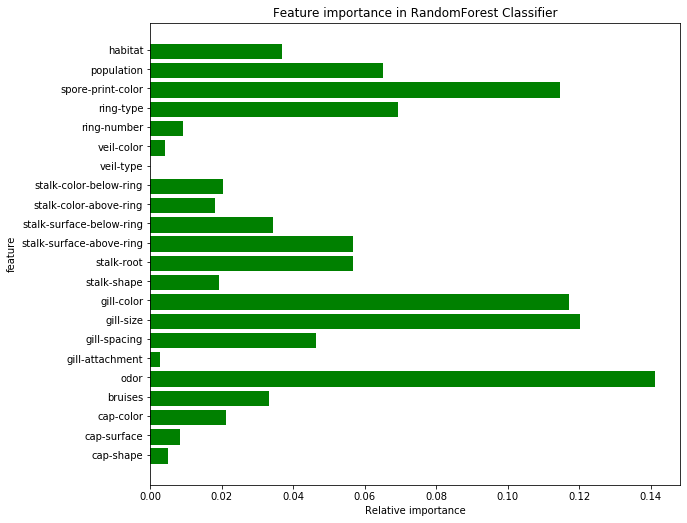

<Figure size 720x720 with 0 Axes>

In [88]:
col = bottle.columns[1:]
#modelname.feature_importance_
y = rf_classifier_model.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.8 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(10,10))
fig.set_size_inches(9.5, 8.5, forward=True)